***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/syp-attacks-threats-and-vulnerabilities/blob/main/README.md) >

## CompTIA Security+ - Course Material 2022
###### Topic: ``Password Attacks``
***

Course material for the ``CompTIA Security+`` module of the ``ICT Associate Apprenticeship (Cybersecurity)`` programme.

<a id="top"></a>
***
## Table of Contents
***

### [Password Attacks](#a) <br/><br/>

- [Plaintext](#b) <br/><br/>
    - [Unencrypted Passwords](#b) <br/><br/>
- [Hashing a Password](#c) <br/><br/>
    - [``SHA-256``](#d) <br/><br/>
        - [Password File](#e) <br/><br/>
- [Attacks](#f) <br/><br/>
    - [Spraying](#f) <br/><br/>
    - [Brute Force](#g) <br/><br/>
    - [Dictionary](#h) <br/><br/>
    - [Rainbow Tables](#i) <br/><br/>
    - [Salt](#j) <br/><br/>
- [January 2019 - Collection #1](#k) <br/><br/>
    - [``haveibeenpwned.com``](#l) 
<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="a"></a>
***
### Password Attacks
***

< [Table of Contents](#top) | [References](#references) >
<a id="b"></a>
***
###### Plaintext | Unencrypted Passwords
***

An attacker loves applications that store passwords as plain text. 

They take the password, they store it in a readable format in a database, and if the attacker finds this database, then they have access to everyone’s usernames and passwords without any additional work. 

Obviously, if you are storing login credentials, you don’t want to store any passwords as plain text, fortunately, this is a very unusual situation if you ever run into it but there are the rare applications that tend to save these passwords in a form that is readable to anyone.

Unfortunately, if you run into one of these situations, you don’t have much of a choice - need to stop using that particular application or find an upgrade to that application that doesn’t store any of these passwords as plain text in the database.

< [Table of Contents](#top) | [References](#references) >
<a id="c"></a>
***
###### Hashing a Password
***

If you don’t store password as plain text:

> How should you store passwords? 

The best way to store password is in a format that uses a hash - this hashing of a password takes the password and represents the password as a string of text information - call this a message digest - sometimes hear this referred to as a fingerprint.

The idea with a hash is you can provide an input to the hash like your password and the resulting hash is something that is very unique, so hashes will not be duplicated on a system and they’ll be very specific to a particular password.

The reason a hash makes such a perfect place to store password is that it is a one way trip. 

It’s a cryptographic algorithm that cannot be reversed, so once you create the hash of a password, you can’t somehow restore that password back to its original format by simply using the hashed value. 

< [Table of Contents](#top) | [References](#references) >
<a id="d"></a>
***
###### ``SHA-256``
***

Some hashes created from some very common passwords using the ``SHA-256`` hashing algorithm.

In [1]:
import hashlib
msg=hashlib.sha256()

Hashing ``123456`` with the [ [``SHA-256``](https://docs.python.org/3/library/hashlib.html#hash-algorithms) ] will get the following message digest. 

In [2]:
msg.update(b"123456")
msg.digest()

b'\x8d\x96\x9e\xefn\xca\xd3\xc2\x9a:b\x92\x80\xe6\x86\xcf\x0c?]Z\x86\xaf\xf3\xca\x12\x02\x0c\x92:\xdcl\x92'

In [3]:
msg.digest_size

32

In [4]:
msg.block_size

64

Notice this is very different than the ``123456`` - not able to tell what this password might be by looking at the hash and there’s no way to reverse the hash back to that original password. 

In [5]:
msg.hexdigest()

'8d969eef6ecad3c29a3a629280e686cf0c3f5d5a86aff3ca12020c923adc6c92'

< [Table of Contents](#top) | [References](#references) >
<a id="e"></a>
***
###### Password File
***

Inside of the application or the operating system that you’re using, you’ll often have a password file that then has the usernames for the user and then the hash that is created from the password for each individual account.

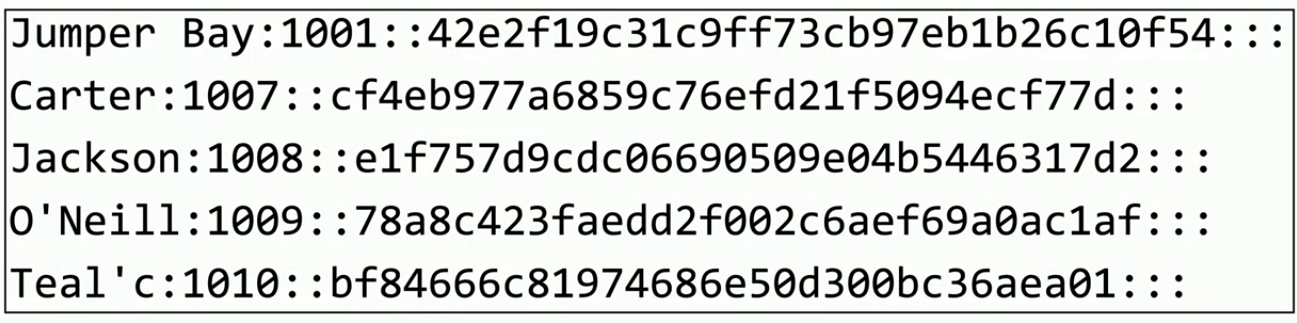

< [Table of Contents](#top) | [References](#references) >
<a id="f"></a>
***
###### Spraying Attack
***

Instead of trying to brute force the hash and determine what the original password might have been, some attackers will use a spraying attack.

A spraying attack avoids the results of a locked account for trying the wrong password over and over again without success. Instead, a spraying attack is going to try to use some very common passwords and only try a few of them before moving on. 

A good example of some of these common passwords can be found on [Wikipedia](https://en.wikipedia.org/wiki/List_of_the_most_common_passwords) under the list of the most common passwords - the top five passwords - probably not unusual that these would be the top five passwords that someone would try to use:

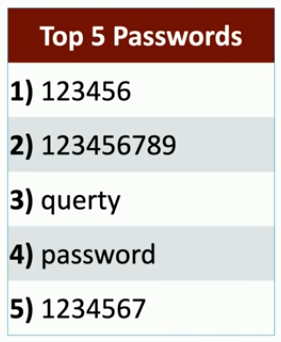

So an attacker using a spraying attack would try an account name and then they might try the top three of these top passwords to see if any one of those happened to be in use - if they gain access by using these top passwords, they can then continue their attack. 

If they do not gain access by using these top passwords, then they stop what they’re doing, they move on to the next account, and they try these top three passwords again. By only trying a few passwords for a single account, they can often avoid any alarms, alerts, or account lockouts that might signal that somebody’s trying to break in to these accounts.

< [Table of Contents](#top) | [References](#references) >
<a id="g"></a>
***
###### Brute Force
***

Some attackers, though, are interested in obtaining the username and password of every account on a system and if they want to be able to determine what those passwords are, then they’ll need to perform a brute force attack against every account. 

A brute force attack is going to try every combination of letters, numbers, special characters, or anything that could make up a password and it’s going to try every combination of those for a single account until it finds a matching password.

This can obviously take some time, if it’s a very long password, you have to go through a lot more iterations to be able to find that and if you’re starting with the hash of a password, then you also have to perform that hash so that you can then compare the hashes to see if you found a match. 

Let’s say that attacker has gained access to a system and they’ve downloaded the password file that contains usernames and password hashes. Now they happen to have one of the hashes associated with a particular user and they would like to perform a brute force attack to find the password associated with that hash.

In [6]:
passwd=hashlib.sha256()
passwd.update(b"password")

In [7]:
passwd.hexdigest()

'5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8'

They’ll start at the very beginning of what possible passwords might be and the beginning here would be the password ``aaaa``. 

They’ll perform a hash of that password and they’ll get the resulting hash value - they’ll then compare that hash value to the hash value they’re trying to match - they’ll see that those don’t match so they’ll go to the next password on their list which is ``aaaab``, they’ll perform a hash of that password, they’ll compare that hash to the hash they’re trying to match, and so on until they find one that matches.

They may have to go through a very long list, but eventually they’ll come up with the combination of letters that makes up the word ``password`` - they’ll perform a hash of ``password``, they’ll get the hash value, and they’ll see that the hash value of ``password`` matches the hash they were looking for - therefore the password associated with this account is the word ``password``.

In [8]:
p=["aaaaa","aaaab","aaaac","password"]
for i in range(0,len(p)):
    m=hashlib.sha256(p[i].encode("utf-8")).hexdigest()
    print(f"Password: {p[i]}\nHash: {m}\n")

Password: aaaaa
Hash: ed968e840d10d2d313a870bc131a4e2c311d7ad09bdf32b3418147221f51a6e2

Password: aaaab
Hash: 5ef1b1016a260f0c229c5b24afe87fe24a68b4c80f6f89535b87e0ca72a08623

Password: aaaac
Hash: b3a7dc940ffbb84720f62ede7fc0c59303210e259a5c4c4c85bfc26fb5f04f4d

Password: password
Hash: 5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8



In [9]:
for i in range(0,len(p)):
    m=hashlib.sha256(p[i].encode("utf-8")).hexdigest()
    if passwd.hexdigest()==m:
        print(f"MATCH: {m}")

MATCH: 5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8


If an attacker was trying to do this online, it would obviously be a very slow process as they were typing in a username and password and there’s probably going to be delays as they try each wrong password and very quickly, they’re going to lock out this account because they’re going to try three, five, or seven passwords before the account is automatically disabled for brute force attacks. 

It’s usually more common for the attacker to have already downloaded the password file. 

They can then perform an offline attack of those hashes where they can programmatically step through every possible combination and do it very quickly on their local machine.

This obviously requires a lot of computational requirements on the local computer but it allows them to go very quickly through this list of passwords. 

< [Table of Contents](#top) | [References](#references) >
<a id="h"></a>
***
###### Dictionary Attacks
***

It obviously takes a long time to incrementally go through every possible combination of letters, and numbers, and special characters, so instead of going through all of those, some attackers will use a subset of those that you might find in a dictionary - call this a dictionary attack where we can use common words taken from a dictionary and see if those happen to be the passwords that we’re looking for.

Will find a lot of different kinds of dictionaries on the internet, especially some groups of passwords that are unique to a particular type of job, for example, there might be a medical dictionary where there are a lot of medical phrases that you can use for passwords that may be from a hospital or an insurance company. 

These dictionary related brute force programs can also perform letter substitutions, so if you’re using the word password as your password but you’re changing the letter ``a`` to the ``&`` and the letter ``o`` to the number ``0``, these programs are already expecting you to do that and they’ll try those combinations as they go through the dictionary attack.

This type of cracking can take quite a bit of time as it goes through all of these different words and combinations of letter substitutions. It’s not unusual for attackers to use a distributed cracking format where multiple systems might be used - they might also take advantage of the high speed CPUs that you might find in a graphical processing unit or a GPU - these external video cards are very high capacity processors and they can perform these calculations very quickly.

So after performing a dictionary attack, they can go through and find common passwords like ``ninja``, ``dragon``, ``football``, or ``letmein``, and of course, are able to identify the hashes associated with all of those.

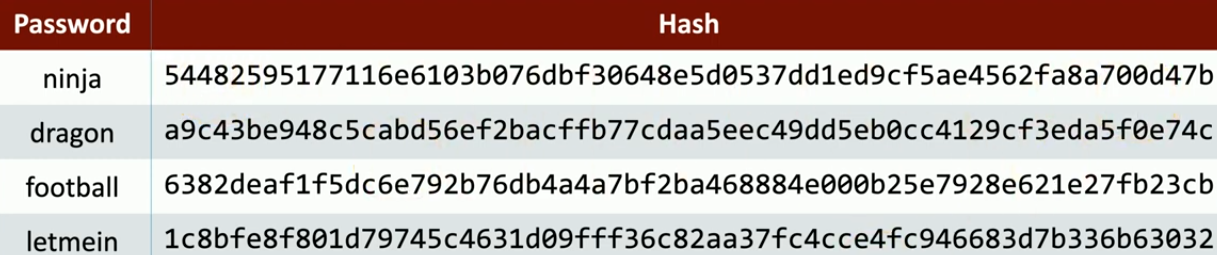

< [Table of Contents](#top) | [References](#references) >
<a id="i"></a>
***
###### Rainbow Tables
***

If going through every possible iteration in a brute force attack and creating hashes to compare, one of the things you might want to do is save all of those hashes and simply do a quick search of those hashes in the future. 

This type of database that contains a massive number of hashes that was created earlier is called a rainbow table. 

This is an optimized table. You’re able to search through it very, very quickly and you’re able to find passwords almost instantly on many of these types of rainbow tables.

Because you don’t have to go through the calculation process of creating the hash, especially with longer types of passwords, this type of rainbow table can be an almost instantaneous lookup to find all of the passwords that might exist in a single set of hashes.

The challenge with rainbow tables is that each type of application or operating system may use a different method to create that hash and if that is the case, then you’ll have to have different rainbow tables that are specific to that particular application or that particular operating system. 

< [Table of Contents](#top) | [References](#references) >
<a id="j"></a>
***
###### Salt
***

Another technique that all programmers should use when they’re storing these passwords is to include a salt.

A salt is a little bit of extra random data added to the password before it is hashed - this means that if two users happen to be using exactly the same password, the hash that’s stored in the password table is going to be different between the two even though their password is exactly the same because a different type of random salt was added to each one of those user’s passwords. 

This means that any pre-built tables like rainbow tables will not work if all of these passwords have been salted because there’s this randomness that has been added to every single password.

Although this doesn’t completely stop the brute force process, it does slow things down and requires that the attacker know exactly how the salt has been implemented so that it can then process and begin the brute forcing of those passwords. 

Taking a single password like the word ``dragon`` and adding a bit of salt to it. 

In [10]:
passwd="dragon"
msg=hashlib.sha256(passwd.encode("utf-8")).hexdigest()
msg

'a9c43be948c5cabd56ef2bacffb77cdaa5eec49dd5eb0cc4129cf3eda5f0e74c'

We’re going to take the password dragon and we’ll add a different set of random salt for each individual user. You’ll notice the hash for every single one of these users is very, very different even though they’re password is exactly the same - this makes it very difficult for an attacker because they’ll look at this hash and they’ll have no idea that any of this information happens to be identical.

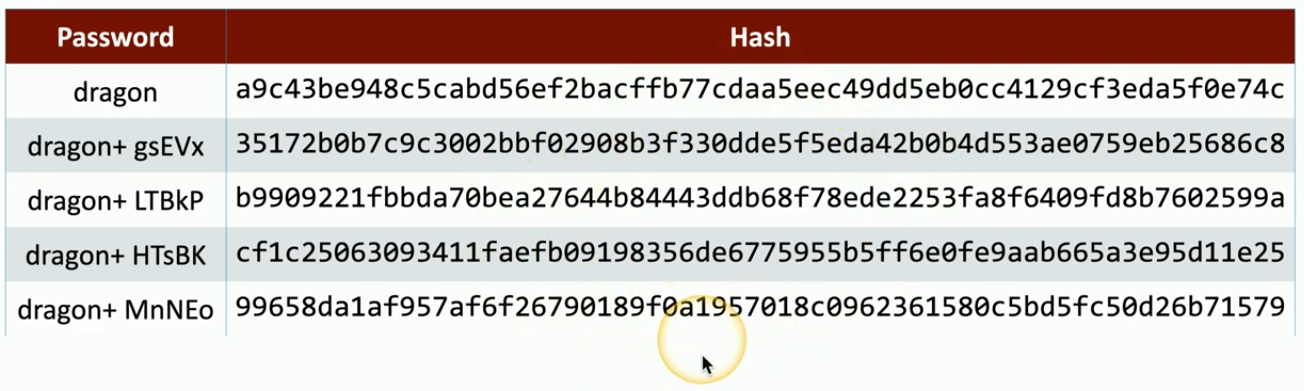

< [Table of Contents](#top) | [References](#references) >
<a id="k"></a>
***
###### January 2019 - Collection #1
***

A good example of what happens when attackers are able to get their hands on these hash passwords occurred in January of 2019 when a large collection of passwords was released called collection number one. 

This consisted of over 12,000 files and 87 gig of data. Within collection number one was over 1.1 billion unique emails and passwords - this was a very large data breach and within the collection, there were 772 million unique usernames across many different accounts.

This meant that there could be as many as 773 million people that were affected by this data breach. 

Although there were over one billion unique emails and passwords, there were only 21 million unique passwords in this entire group - this is another good reason why you might want to have a password manager that makes a different password for every single one of your accounts.

< [Table of Contents](#top) | [References](#references) >
<a id="l"></a>
***
###### ``haveibeenpwned.com``
***

Interested in knowing if you were part of this data breach - go [ [haveibeenpwned](https://www.haveibeenpwned.com) ]. 

This site allows you to simply put in your email address and it will tell you if that address is part of one of many different breaches and they’re always adding new breaches to the list, so this should be a site that you’re always going back to to see if maybe your username and password may have been released.

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

J. "Professor" Messer, "CompTIA Security+ (SY0-601) Course Notes," [professormesser.com](https://web.archive.org/web/20220521181010/https://www.professormesser.com/security-plus/sy0-601/sy0-601-video/sy0-601-comptia-security-plus-course/), September 2021.

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [11]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK